# Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import plotly.express as px

## Reading .csv file via URL

In [2]:
url='https://drive.google.com/file/d/1VfCaU5vFVWsSYrvKQF2x9iS6I7KoWEVH/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
1,jora,NaN,NaN,uwi,2906.0
2,lala,NaN,NaN,kal013,2756.0
3,wesnerm,NaN,NaN,wmoise,2696.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0


We would like to have data with both codechef and codeoforces ratings to make a predition model.


In [3]:
df.dropna(inplace=True)
df.head()

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0
5,aurinegro,aurinegro,2202.0,aurinegro,2628.0
6,retrograd,retrograd,2262.0,retrograd,2628.0
7,chris19,anudeep2011,2023.0,anudeep2011,2565.0


It would be great to have shape of the dataset to get idea of its size and how to carry our operations further!!

In [4]:
df.shape

(6442, 5)

 Now, we would get the names of the columns and their datatypes for sure !!

In [5]:
print(df.columns)
print(df.dtypes)

Index(['ss_username', 'cf_username', 'cf_rating', 'cc_username', 'cc_rating'], dtype='object')
ss_username     object
cf_username     object
cf_rating      float64
cc_username     object
cc_rating      float64
dtype: object


A important step of knowing that does our dataset contain duplicate rows or not.

In [6]:
df.duplicated().sum()

np.int64(0)

## Noting all basic stastical data of dataset

In [7]:
df.describe()

,cf_rating,cc_rating
count,6442.000000,6442.000000
mean,1370.821329,1687.728035
std,331.653855,249.105750
min,187.000000,277.000000
25%,1153.250000,1548.000000
50%,1366.000000,1702.000000
75%,1592.000000,1845.000000
max,3764.000000,3007.000000


## Summary of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6442 entries, 0 to 10278
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ss_username  6442 non-null   object 
 1   cf_username  6442 non-null   object 
 2   cf_rating    6442 non-null   float64
 3   cc_username  6442 non-null   object 
 4   cc_rating    6442 non-null   float64
dtypes: float64(2), object(3)
memory usage: 302.0+ KB


## A Correlation Matrix

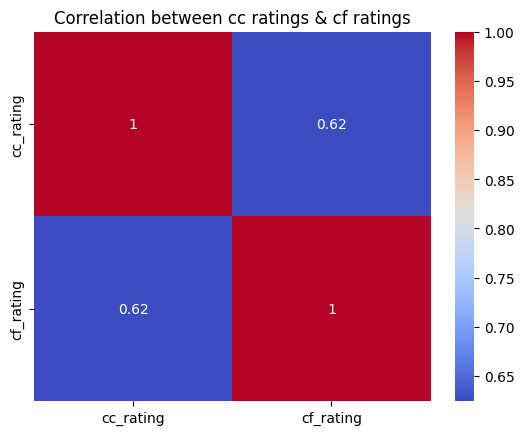

In [9]:
sns.heatmap(df[['cc_rating','cf_rating']].corr(), cbar=True, annot=True, cmap='coolwarm') # By default "Pearson" method
plt.title('Correlation between cc ratings & cf ratings')
plt.show()

The above correlation matrix/heatmap is used to plot as a color coded grid which computes correlation matrix between codechef ratings & codeforces ratings.

Getting another correlation matrix but this time with "spearman" method whereas the one in heatmap is "pearson".

In [10]:
df['cc_rating'].corr(df['cf_rating'], method='spearman') # Also method named "kendall" is present

np.float64(0.6524971721738059)

## Scatter Plot between codechef ratings & codeforces ratings

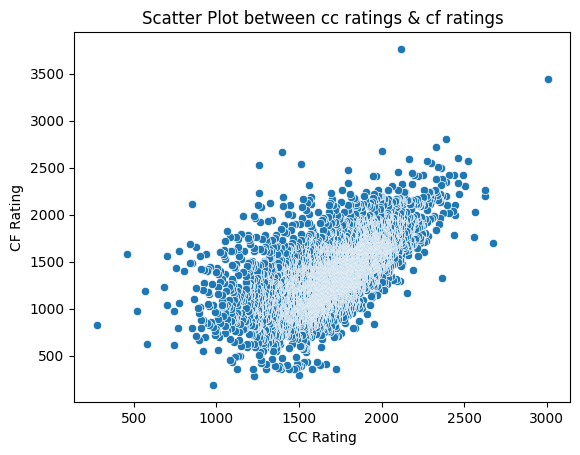

In [11]:
sns.scatterplot(x='cc_rating', y='cf_rating', data=df)
plt.xlabel('CC Rating')
plt.ylabel('CF Rating')
plt.title('Scatter Plot between cc ratings & cf ratings')
plt.show()

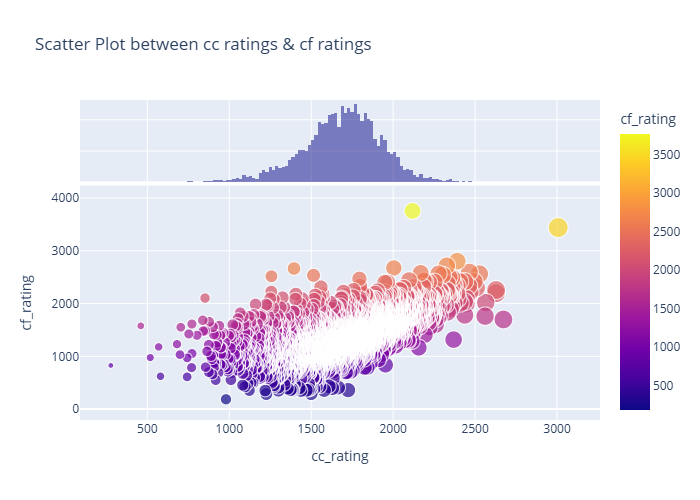

In [12]:
fig1 = px.scatter(df, x='cc_rating', y='cf_rating', title='Scatter Plot between cc ratings & cf ratings', color='cf_rating', size='cc_rating', marginal_x='histogram')
fig1.show(renderer='png')

I have plotted a scatter plot to show how are the points concentrated. Also its imprtant to plot a scatter plot as it might indicate whether the trends are linear or non-linear !!

## KDE Plot (Kernel Density Estimation Plot) between codechef ratings & codeforces ratings

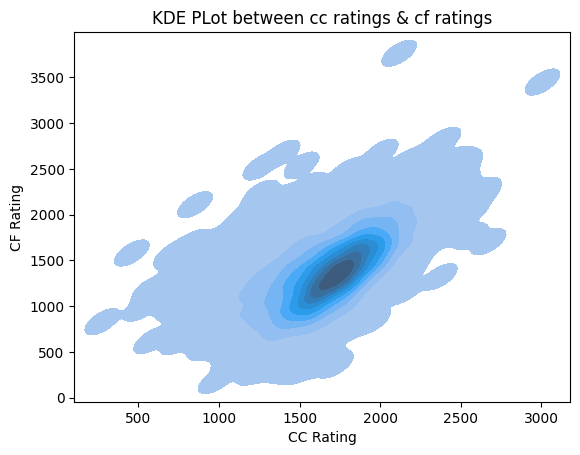

In [13]:
sns.kdeplot(x='cc_rating', y='cf_rating', data=df, fill=True, thresh=0.0005)
plt.xlabel('CC Rating')
plt.ylabel('CF Rating')
plt.title('KDE PLot between cc ratings & cf ratings')
plt.show()

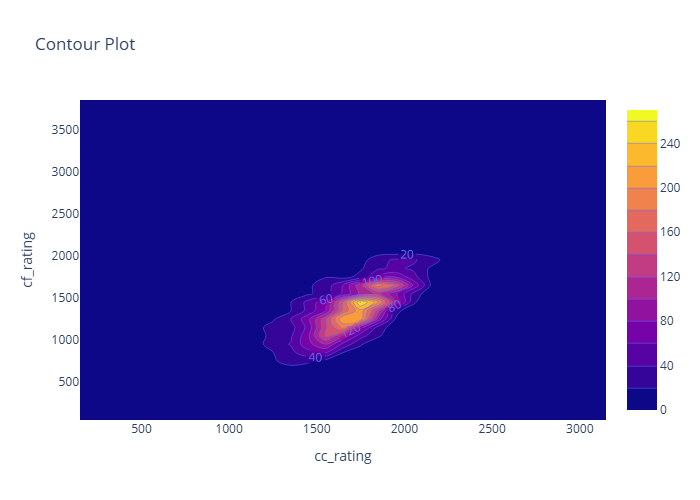

In [14]:
fig2 = px.density_contour(df, x='cc_rating', y='cf_rating', title='Contour Plot')
fig2.update_traces(contours_coloring="fill", contours_showlabels = True)
fig2.show(renderer='png')

This KDE Plot gives an valuable insights like:


*   Whether the data consists of outliners or not
*   Shows the density of data points


## Removing outliners via IQR (Inter Quantile Range) method

In [15]:
for i in ['cf_rating', 'cc_rating'] :
  Q1 = df[i].quantile(0.25) # 25th percentile
  Q3 = df[i].quantile(0.75) # 75th percentile

  lower_bound = Q1 - 1.5 * (Q3 - Q1)
  upper_bound = Q3 + 1.5 * (Q3 - Q1)

  df1 = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

df1.shape

(6256, 5)

Taking the count of outliners !!

In [16]:
outliners = len(df) - len(df1)
outliners

186

## KDE Plot between codechef ratings and codeforces ratings (without outliners)

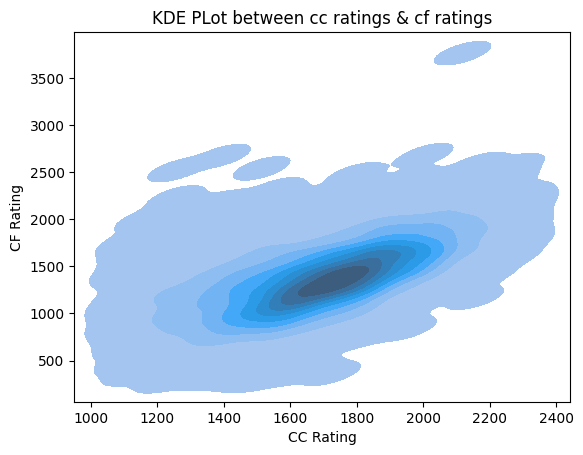

In [17]:
sns.kdeplot(x='cc_rating', y='cf_rating', data=df1, fill=True, thresh=0.0005)
plt.xlabel('CC Rating')
plt.ylabel('CF Rating')
plt.title('KDE PLot between cc ratings & cf ratings')
plt.show()

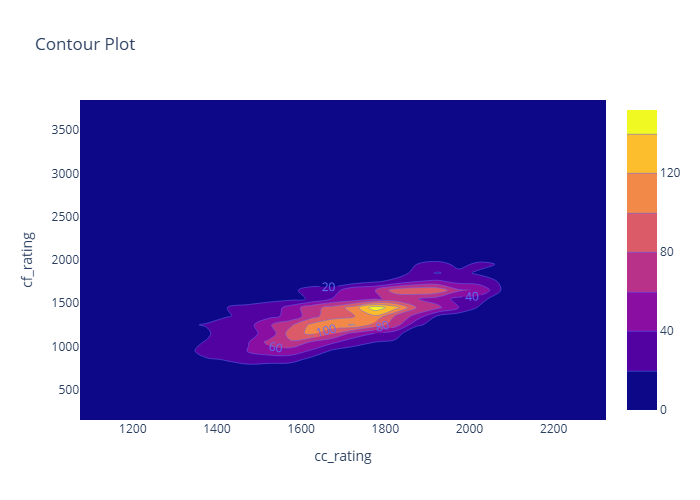

In [18]:
fig3 = px.density_contour(df1, x='cc_rating', y='cf_rating', title='Contour Plot')
fig3.update_traces(contours_coloring="fill", contours_showlabels = True)
fig3.show(renderer='png')

I have plotted KDE Plot again to see how influencing were those outliners. As one might see that the density on overall plot has changed !!

Calculating percentage of outliners !!

In [19]:
percent_outliners = outliners / len(df) * 100
percent_outliners

2.887302080099348

## Histogram with KDE between the parameters itself , before & after removing outliners

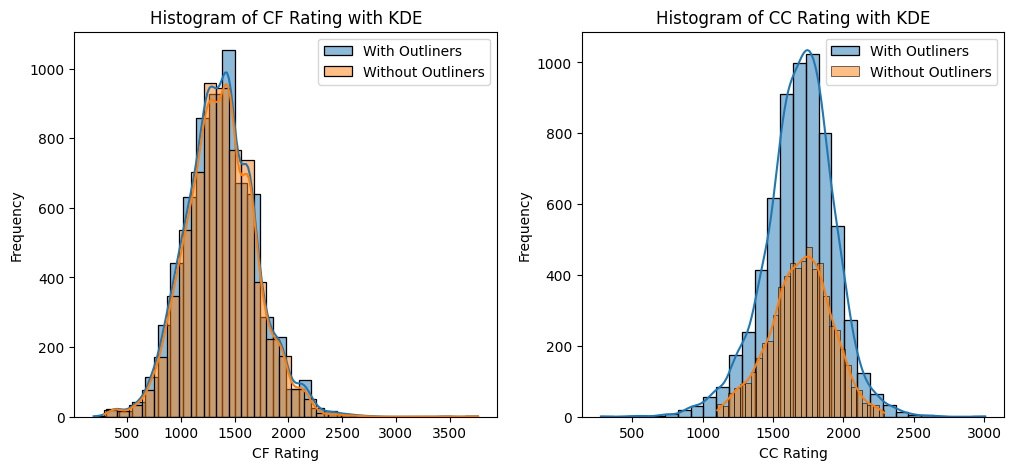

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(x='cf_rating', data=df, kde=True, label='With Outliners', ax=axes[0], bins=30)
axes[0].set_title('Histogram of CF Rating with KDE')
sns.histplot(x='cf_rating', data=df1, kde=True, label='Without Outliners', ax= axes[0], bins=30)
axes[0].set_title('Histogram of CF Rating with KDE')
axes[0].set_xlabel('CF Rating')
axes[0].set_ylabel('Frequency')
axes[0].legend()

sns.histplot(x='cc_rating', data=df, kde=True, label='With Outliners', ax=axes[1], bins=30)
axes[1].set_title('Histogram of CF Rating with KDE')
sns.histplot(x='cc_rating', data=df1, kde=True, label='Without Outliners', ax=axes[1], bins=30)
axes[1].set_title('Histogram of CC Rating with KDE')
axes[1].set_xlabel('CC Rating')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.show()

The histogram with KDE shows that the outliners were more from codechef rating column than that of codeforces ones !!

## Assigning variables for training data

In [21]:
X_train = df1['cc_rating'].to_numpy().flatten()
Y_train = df1['cf_rating'].to_numpy().flatten()

## Plotting a regplot (Regression Plot) between codechef ratings & codeforces ratings

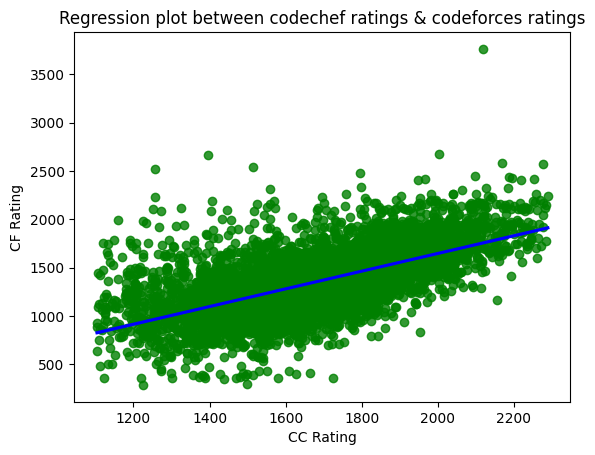

In [22]:
sns.regplot(x='cc_rating', y='cf_rating', data=df1, scatter_kws={'color':'green'}, line_kws={'color':'blue'}, order=1)
plt.title("Regression plot between codechef ratings & codeforces ratings")
plt.xlabel('CC Rating')
plt.ylabel('CF Rating')
plt.show()

Insights extracted from above plot:


*   The regplot line is linear as order=1 is mentioned
*   Hypothetically if we get "0" rating of codechef , it would result in negative rating of codeforces
*   As minimum ratings for both codeforces and codechef are greater than 100, so the negative part won't be that big issue




## Gradient Descent Code for training the model

In [23]:
weight = 1.0 # Slope of line
bias = -185.0 # y - Intercept of line
learning_rate = 3.3e-7
epochs = 100000 # Number of times
m = len(X_train) # Number of samples
reg_lambda = 1000 # lambda parameter for regularization term

for j in range(epochs):
    y_pred = weight * X_train + bias # Predicted y        f(w,b) = w * x + b = y_pred
    error = y_pred - Y_train

    dw = np.dot(X_train, error) + reg_lambda * weight # Change made on "w" per step
    db = np.sum(error) # Change made on "b" per step

    weight -= (learning_rate / m) * dw
    bias -= (learning_rate / m) * db

print(f"Weight: {weight}, Bias: {bias}")

print(f"Model: y = ({weight})x + ({bias})")

Weight: 0.9159582102199609, Bias: -185.00024447800962
Model: y = (0.9159582102199609)x + (-185.00024447800962)


## Representing the Model line !!

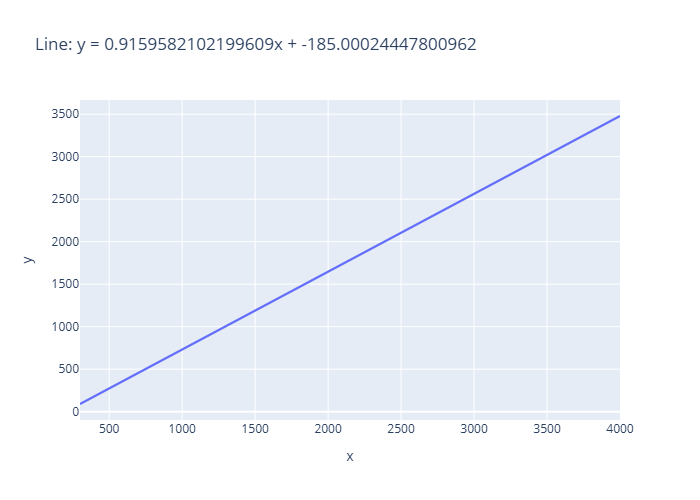

In [24]:
x = np.linspace(300, 4000, 100)
y = weight * x + bias

df = pd.DataFrame({'x': x, 'y': y})

fig4 = px.line(df, x='x', y='y', title=f'Line: y = {weight}x + {bias}')
fig4.show(renderer='png')

## Calculting R² for the Model !!


"R²" ranges: -inf ≤ R² ≤ 1

* R²: negative = very bad model, worst than nothing
* R²: 0 = no improvement
* R²: 1 = perfect fit

In [25]:
ss_res = np.sum((Y_train - y_pred) ** 2) #
ss_tot = np.sum((Y_train - np.mean(Y_train)) ** 2)
r2 = 1 - (ss_res / ss_tot)
print("R² Score:", r2)

R² Score: 0.39146998581676273


## Defined a function to convert codechef ratings to codeforces ratings

In [26]:
def cc_to_cf(codechef_rating):
    codeforces_rating = (codechef_rating * weight) + bias
    return codeforces_rating

for i in range(700,2100,50):
    print(f"Codechef: {i}.0 --> Codeforces: {round(cc_to_cf(i), 0)}")

Codechef: 700.0 --> Codeforces: 456.0
Codechef: 750.0 --> Codeforces: 502.0
Codechef: 800.0 --> Codeforces: 548.0
Codechef: 850.0 --> Codeforces: 594.0
Codechef: 900.0 --> Codeforces: 639.0
Codechef: 950.0 --> Codeforces: 685.0
Codechef: 1000.0 --> Codeforces: 731.0
Codechef: 1050.0 --> Codeforces: 777.0
Codechef: 1100.0 --> Codeforces: 823.0
Codechef: 1150.0 --> Codeforces: 868.0
Codechef: 1200.0 --> Codeforces: 914.0
Codechef: 1250.0 --> Codeforces: 960.0
Codechef: 1300.0 --> Codeforces: 1006.0
Codechef: 1350.0 --> Codeforces: 1052.0
Codechef: 1400.0 --> Codeforces: 1097.0
Codechef: 1450.0 --> Codeforces: 1143.0
Codechef: 1500.0 --> Codeforces: 1189.0
Codechef: 1550.0 --> Codeforces: 1235.0
Codechef: 1600.0 --> Codeforces: 1281.0
Codechef: 1650.0 --> Codeforces: 1326.0
Codechef: 1700.0 --> Codeforces: 1372.0
Codechef: 1750.0 --> Codeforces: 1418.0
Codechef: 1800.0 --> Codeforces: 1464.0
Codechef: 1850.0 --> Codeforces: 1510.0
Codechef: 1900.0 --> Codeforces: 1555.0
Codechef: 1950.0 -

## Defined a function to convert codeforces ratings into codechef ratings

In [27]:
def cf_to_cc(codeforces_rating):
    codechef_rating = (codeforces_rating -bias) / weight
    return codechef_rating

for i in range(700,2100,50):
    print(f"Codechef: {i}.0 --> Codeforces: {round(cf_to_cc(i), 0)}")

Codechef: 700.0 --> Codeforces: 966.0
Codechef: 750.0 --> Codeforces: 1021.0
Codechef: 800.0 --> Codeforces: 1075.0
Codechef: 850.0 --> Codeforces: 1130.0
Codechef: 900.0 --> Codeforces: 1185.0
Codechef: 950.0 --> Codeforces: 1239.0
Codechef: 1000.0 --> Codeforces: 1294.0
Codechef: 1050.0 --> Codeforces: 1348.0
Codechef: 1100.0 --> Codeforces: 1403.0
Codechef: 1150.0 --> Codeforces: 1457.0
Codechef: 1200.0 --> Codeforces: 1512.0
Codechef: 1250.0 --> Codeforces: 1567.0
Codechef: 1300.0 --> Codeforces: 1621.0
Codechef: 1350.0 --> Codeforces: 1676.0
Codechef: 1400.0 --> Codeforces: 1730.0
Codechef: 1450.0 --> Codeforces: 1785.0
Codechef: 1500.0 --> Codeforces: 1840.0
Codechef: 1550.0 --> Codeforces: 1894.0
Codechef: 1600.0 --> Codeforces: 1949.0
Codechef: 1650.0 --> Codeforces: 2003.0
Codechef: 1700.0 --> Codeforces: 2058.0
Codechef: 1750.0 --> Codeforces: 2113.0
Codechef: 1800.0 --> Codeforces: 2167.0
Codechef: 1850.0 --> Codeforces: 2222.0
Codechef: 1900.0 --> Codeforces: 2276.0
Codeche